<a href="https://colab.research.google.com/github/prashikl007/S_parameters/blob/main/MPJ_S_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('S-parameter_MIMO_Sample.xlsx')

In [ ]:
df[['Frequency','S22','S11','S21','S12']]

,Frequency,S22,S11,S21,S12
0,2.000000,-0.253568,-0.250842,-30.732275,-30.798674
1,2.020202,-0.285363,-0.282308,-29.781589,-29.849707
2,2.040404,-0.323050,-0.319532,-28.824621,-28.894059
3,2.060606,-0.368653,-0.364543,-27.801250,-27.871094
4,2.080808,-0.432579,-0.427529,-27.027223,-27.098112
...,...,...,...,...,...
95,3.919192,-0.307978,-0.306681,-39.013646,-38.990785
96,3.939394,-0.318004,-0.316604,-38.560238,-38.537648
97,3.959596,-0.328867,-0.327381,-38.106853,-38.087891
98,3.979798,-0.340569,-0.339061,-37.656142,-37.638426


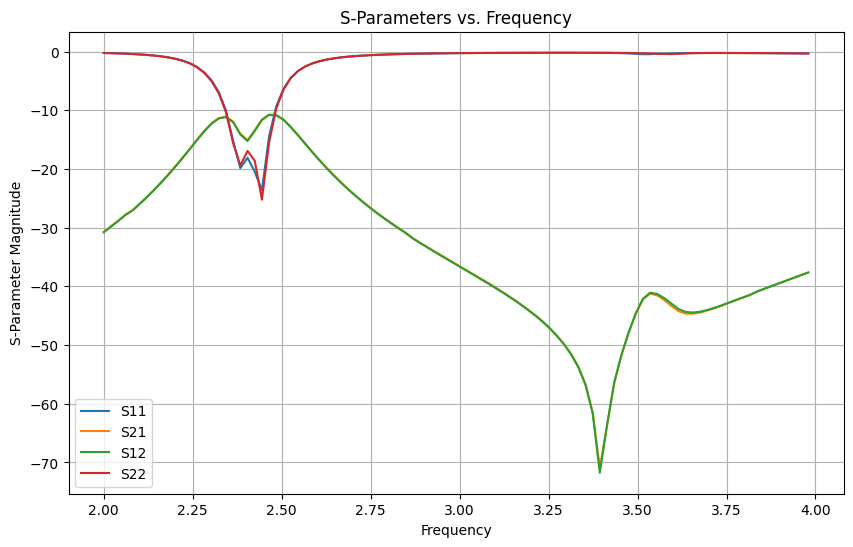

In [ ]:
# prompt: generate graph of S22, S11, S21, S12 with respect to Frequency of above dataframe

import matplotlib.pyplot as plt

# Assuming 'df' is already defined and contains the necessary columns
# as in the previous response.

plt.figure(figsize=(10, 6))

plt.plot(df['Frequency'], df['S11'], label='S11')
plt.plot(df['Frequency'], df['S21'], label='S21')
plt.plot(df['Frequency'], df['S12'], label='S12')
plt.plot(df['Frequency'], df['S22'], label='S22')

plt.xlabel('Frequency')
plt.ylabel('S-Parameter Magnitude')
plt.title('S-Parameters vs. Frequency')
plt.legend()
plt.grid(True)
plt.show()


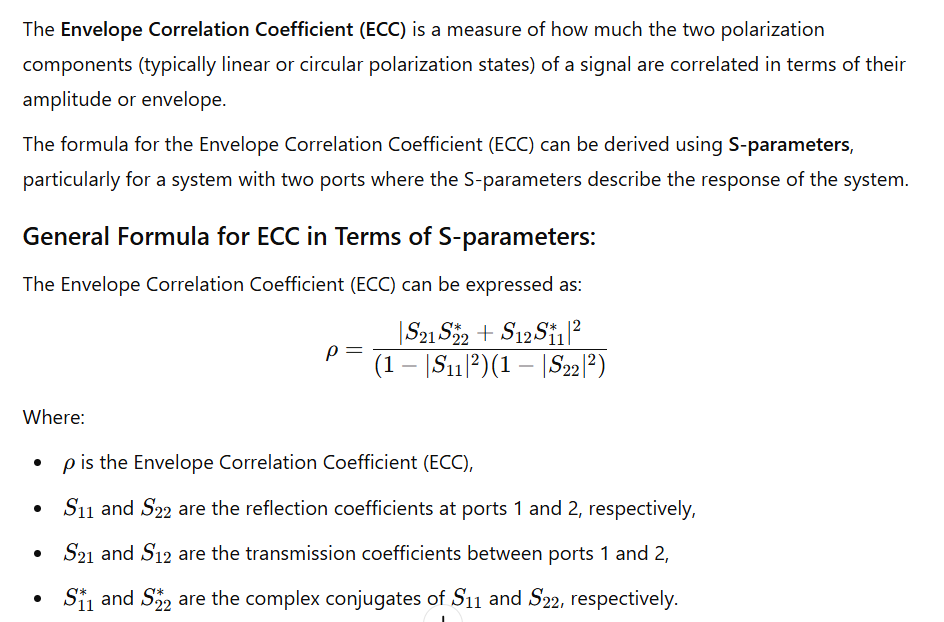

In [ ]:
s11 = df['S11']
s12 = df['S12']
s21 = df['S21']
s22 = df['S22']

In [ ]:
S11_conj = np.conj(s11)
S22_conj = np.conj(s22)
S12_conj = np.conj(s12)
S21_conj = np.conj(s21)

In [ ]:
numerator = np.square(np.abs(s21 * S22_conj + s12 * S11_conj))

In [ ]:
denominator = (1- np.square(np.abs(s11)) - np.square(np.abs(s21)))*(1- np.square(np.abs(s22)) - np.square(np.abs(s12)))

In [ ]:
ecc = numerator/denominator

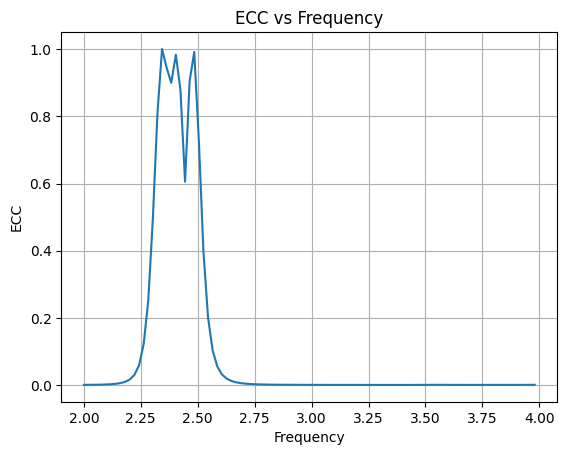

In [ ]:
# Handle potential division by zero
#ecc = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator!=0)


plt.plot(df['Frequency'], ecc)
plt.xlabel('Frequency')
plt.ylabel('ECC')
plt.title('ECC vs Frequency')
plt.grid(True)
plt.show()

In [ ]:
dg = 10*np.sqrt(1 - np.square(ecc))

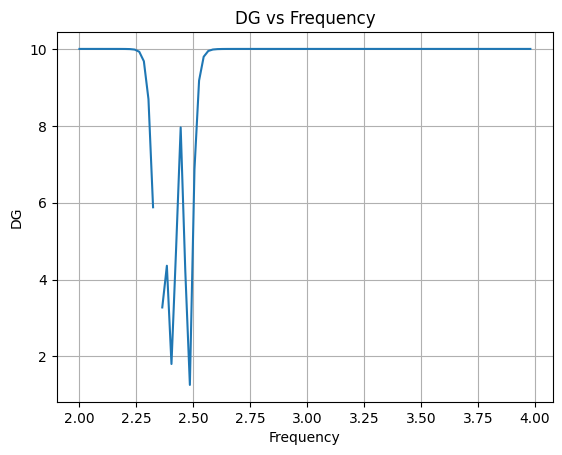

In [ ]:
plt.plot(df['Frequency'], dg)
plt.xlabel('Frequency')
plt.ylabel('DG')
plt.title('DG vs Frequency')
plt.grid(True)
plt.show()

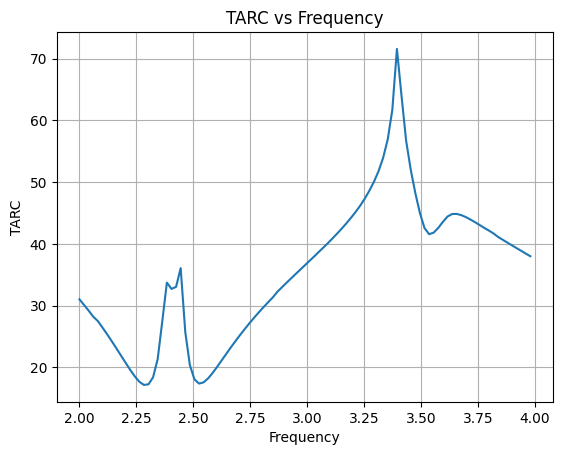

In [ ]:
num1 = np.square(s11 + s12)
num2 = np.square(s22 + s21)

tarc = np.sqrt((num1 + num2)/2)

plt.plot(df['Frequency'], tarc)
plt.xlabel('Frequency')
plt.ylabel('TARC')
plt.title('TARC vs Frequency')
plt.grid(True)
plt.show()

In [ ]:
del11 = 1 - np.square(np.abs(s11)) + np.square(np.abs(s12))
del22 = 1 - np.square(np.abs(s22)) + np.square(np.abs(s21))
del12 = - (s12*S11_conj + s22*S12_conj)
del21 = - (s21*S22_conj + s11*S21_conj)

In [ ]:
# prompt: length of del11
print(len(del11))

100


In [ ]:
det_m = []

for i in range(0,len(del11)):
  del_matrix = np.array([[del11[i], del12[i]], [del21[i], del22[i]]])
  det_m.append(np.linalg.det(del_matrix))


/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [ ]:
import math
ccl = []
print(len(det_m))

for i in range(0,len(det_m)-1):
  # Check if det_m[i] is positive before calculating the logarithm
  if det_m[i] > 0:
    ccl.append(-math.log2(det_m[i]))
  else:
    # Handle non-positive values (e.g., skip, replace with a default value)
    print(f"Warning: det_m[{i}] = {det_m[i]} is non-positive. Skipping this value.")
    # Or you can append a default value, like:
    # ccl.append(0)  # Replace 0 with your desired default value

100
